<a href="https://colab.research.google.com/github/pranavkantgaur/curves_and_surfaces/blob/master/parametric_representations/Hermite_curves_lec_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives:


1.   Discussion on relation between geometric continuity, $G$ and parameteric continuity, $C$.
2.   Context for upcoming parametric curves
3.   Concept of _Blending functions_
4.   Intro to the Hermite curves

## Geometric continuity vs Parametric continuity
* Often $C_i$ implies $G_i$, except few cases.
* 

## Context for upcoming parametric curves
The geometric constraints--in terms of their number and type--depend on the required nature of curves (cubic vs lower vs higher than cubic), nature of continuity desired at endpoints of the curve segments. The geometric contraints are as follows (for cubic curves):
  * 2 endpoints and corresponding tangent vectors: Hermite curves
  * 2 endpoints and other points(not on the curve) which define tangent vectors: Bezier curves
  * 4 control points: Splines

## Blending functions

In [0]:
import matplotlib.pyplot as plt # for drawing 2D curves
import math 
import numpy as np
from numpy import arange

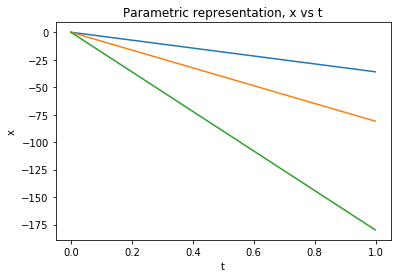

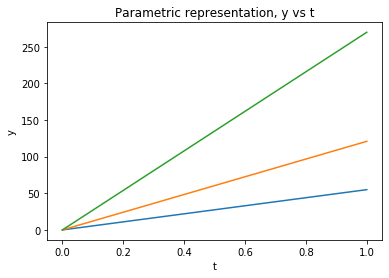

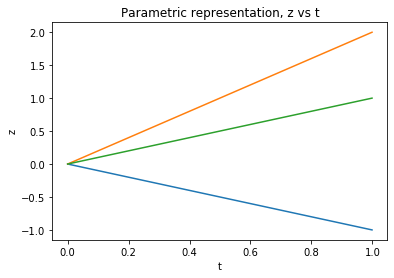

In [0]:
class CubicCurves(object):
  def __init__(self, basis_matrix):
    self.basis_matrix = basis_matrix
    self.geometric_constraints_matrix = None

  def set_geometric_constraints_matrix(self, geometric_constraints_matrix):
    self.geometric_constraints_matrix = geometric_constraints_matrix
  
  def sample_curve_segment(self, t):
    g = np.dot(self.basis_matrix, self.geometric_constraints_matrix)
    t_vector = np.array([pow(t, 3), pow(t, 2), pow(t, 1), 1])
    q = np.dot(t, g)   
    return q # 1 X 3 vector
  
  def sample_blending_function(self, t):    
    t_vector = np.array([pow(t, 3), pow(t, 2), pow(t, 1), 1])
    b = np.dot(t_vector, self.basis_matrix)
    return b # samples the blending functions at 't'

if __name__ == '__main__' :    
  
  basis_matrix = np.array([[2, -2, 1, 1],[-3, 3, -2, -1],[0, 0, 1, 0], [1, 0, 0, 0]])
  hermite = CubicCurves(basis_matrix)
  geometric_constraints_matrix = np.array([[2, 3, 5],[20, 45, 96],[-1, 2, 1],[1, 1, 1]])
  hermite.set_geometric_constraints_matrix(geometric_constraints_matrix)
  # generate list of (x, y)  
  n_points = 1000
  x = [t for t in arange(0, 1, 1 / n_points)] 
  y = []
  for i in x:
    y.append(hermite.sample_curve_segment(i))  
  
  xt = [y[i][0]  for i in range(n_points)]
  yt = [y[i][1]  for i in range(n_points)]
  zt = [y[i][2]  for i in range(n_points)]
  
  plt.plot(x, xt)  # xt   
  plt.title('Parametric representation, x vs t')
  plt.ylabel('x')
  plt.xlabel('t')
  plt.show()  

  plt.plot(x, yt)  # yt   
  plt.title('Parametric representation, y vs t')
  plt.ylabel('y')
  plt.xlabel('t')
  plt.show()   

  plt.plot(x, zt)  # zt   
  plt.title('Parametric representation, z vs t')
  plt.ylabel('z')
  plt.xlabel('t')
  plt.show()     


## Hermite curves
* A demo:
  * https://www.geogebra.org/m/wTneDg9v

In [0]:
# Demo of Hermite curves